### Buisness problem- 
### predicting the insurance leads for a  insurance company 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
df1=pd.read_csv("train_insure.csv")
df=pd.read_csv("train_insure.csv")
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [3]:
t = pd.read_csv("test_insure.csv")
t.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [3]:
# dataset understanding
#ID	Unique Identifier for a row
#1	City_Code	Code for the City of the customers
#2	Region_Code	Code for the Region of the customers
#3	Accomodation_Type	Customer Owns or Rents the house
#4	RecoInsuranceType	Joint or Individual type for the recommended insurance
#5	Upper_Age	Maximum age of the customer
#6	Lower _Age	Minimum age of the customer
#7	Is_Spouse	If the customers are married to each other
#8	NaN	(in case of joint insurance)
#9	Health_Indicator	Encoded values for health of the customer
#10	HoldingPolicyDuration	Duration (in years) of holding policy (a policy that customer has already subscribed to with the company)
#11	HoldingPolicyType	Type of holding policy
#12	RecoPolicyCat	Encoded value for recommended health insurance
#13	RecoPolicyPremium	Annual Premium (INR) for the recommended health insurance
#14	Response (Target)	0 : Customer did not show interest in the recommended policy
                        #1 : Customer showed interest in the recommended policy

# EDA 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [5]:
df.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [6]:
l=list(df.columns)  
l1=[]
l2=[]
l3=[]
for i in l:
   if df.loc[:,i].dtype == "float":
      l1.append(i)
   elif df.loc[:,i].dtype == "object":
      l2.append(i)
   elif df.loc[:,i].dtype == "int64":
      l3.append(i)
print("float",l1)
print("object",l2)
print("int",l3)

float ['Holding_Policy_Type', 'Reco_Policy_Premium']
object ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration']
int ['ID', 'Region_Code', 'Upper_Age', 'Lower_Age', 'Reco_Policy_Cat', 'Response']


In [7]:
df.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [8]:
df.corr()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
ID,1.000000,-0.000465,-0.001725,0.001101,0.006649,-0.002235,-0.002350,0.005159
Region_Code,-0.000465,1.000000,-0.005649,-0.005928,0.011599,-0.065120,-0.010797,0.001121
Upper_Age,-0.001725,-0.005649,1.000000,0.921392,0.141890,0.025257,0.792689,0.002772
Lower_Age,0.001101,-0.005928,0.921392,1.000000,0.118028,0.021163,0.615739,-0.002099
Holding_Policy_Type,0.006649,0.011599,0.141890,0.118028,1.000000,0.079678,0.121342,0.009297
Reco_Policy_Cat,-0.002235,-0.065120,0.025257,0.021163,0.079678,1.000000,0.060989,0.114321
Reco_Policy_Premium,-0.002350,-0.010797,0.792689,0.615739,0.121342,0.060989,1.000000,0.007943
Response,0.005159,0.001121,0.002772,-0.002099,0.009297,0.114321,0.007943,1.000000


<AxesSubplot:>

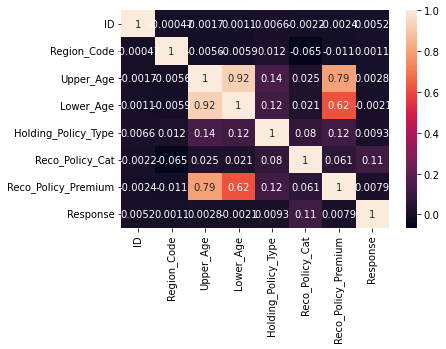

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
#observations - reco_policy_cat has only good correlation with target variable.
# we can remove other above variables  from input data except reco_policy_cat.

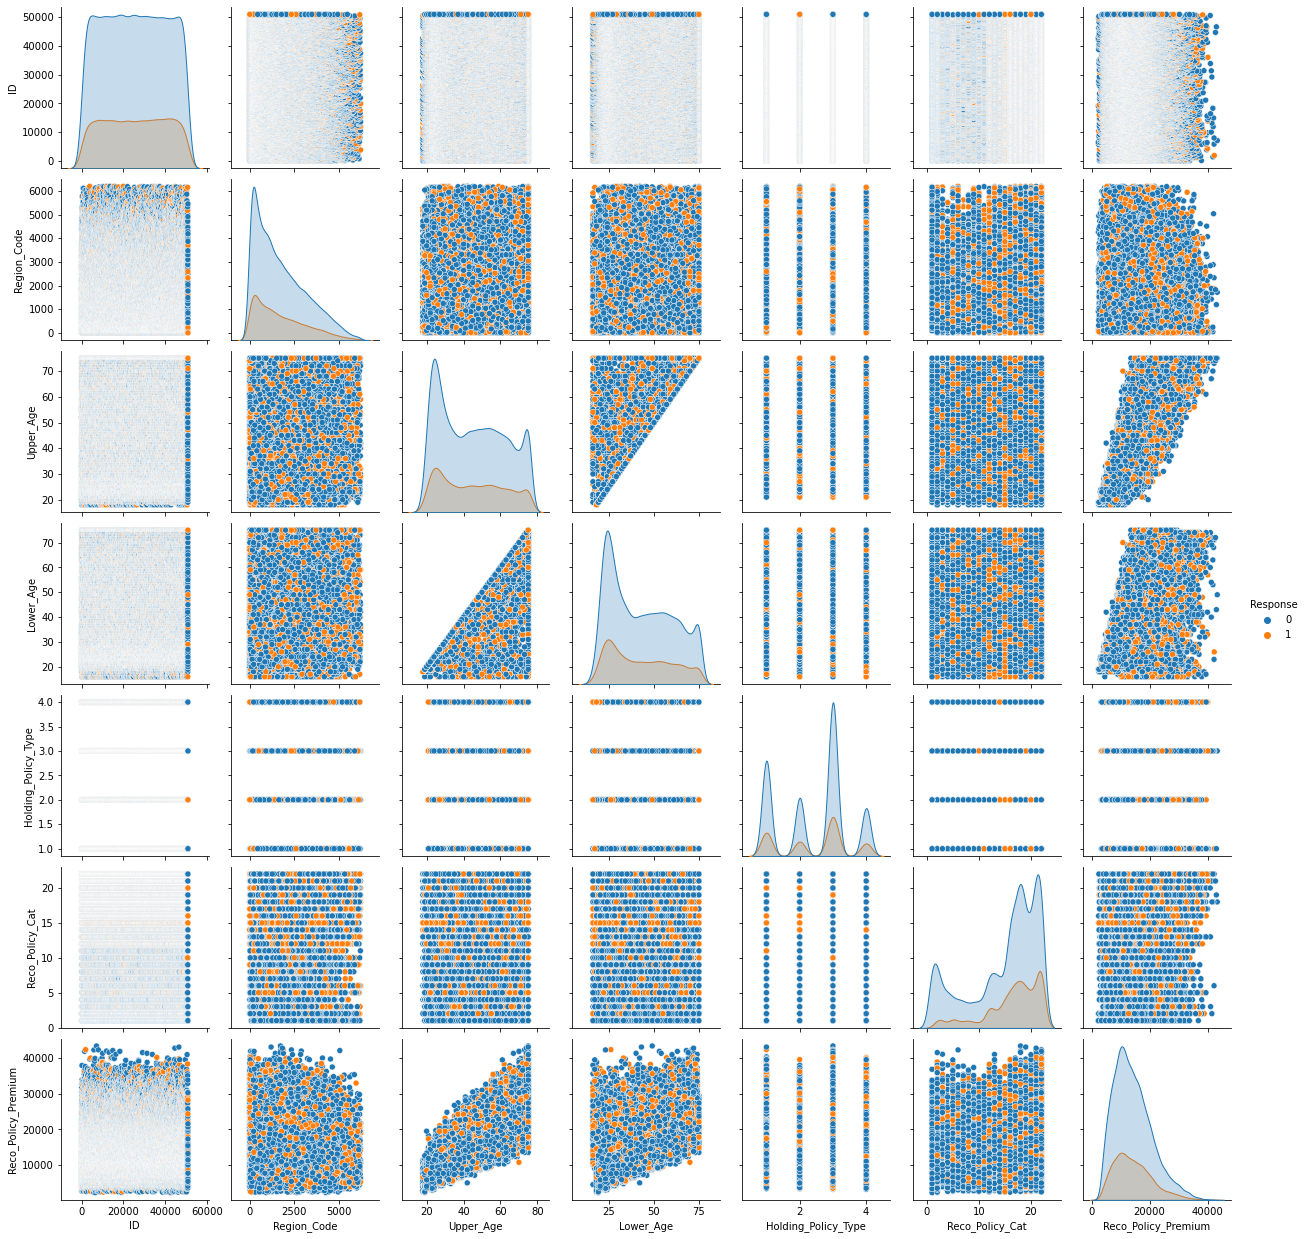

In [11]:
sns.pairplot(df,hue="Response")

In [10]:
l2

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration']

<AxesSubplot:xlabel='Is_Spouse', ylabel='count'>

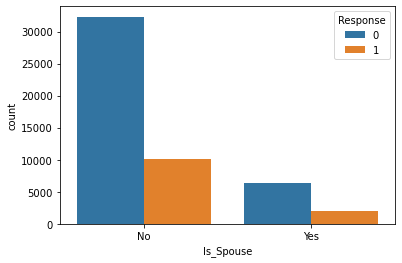

In [11]:
sns.countplot(df.Is_Spouse,hue=df.Response)

<AxesSubplot:xlabel='Health Indicator', ylabel='count'>

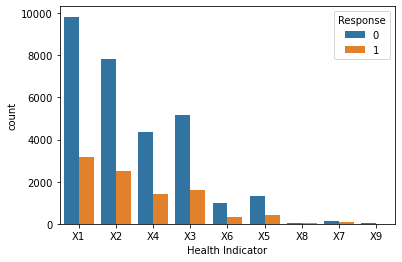

In [12]:
sns.countplot(df["Health Indicator"],hue=df.Response)

In [13]:
# observation X8 , X7,X9 has no change for response variable.

<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

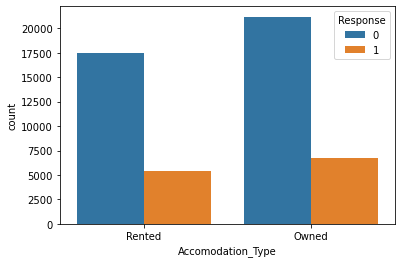

In [14]:
sns.countplot(df.Accomodation_Type,hue=df.Response)

<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='count'>

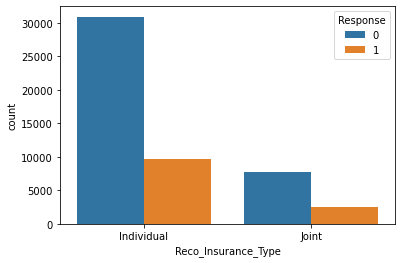

In [15]:
sns.countplot(df.Reco_Insurance_Type,hue=df.Response)

<AxesSubplot:xlabel='Holding_Policy_Duration', ylabel='count'>

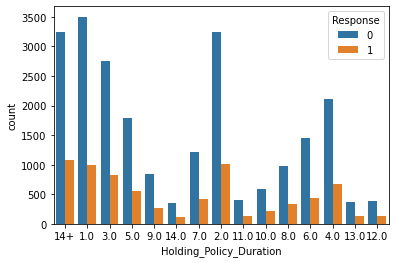

In [16]:
sns.countplot(df.Holding_Policy_Duration,hue=df.Response)

<AxesSubplot:xlabel='Reco_Policy_Cat', ylabel='count'>

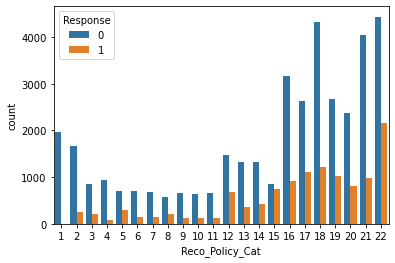

In [17]:
sns.countplot(df.Reco_Policy_Cat,hue=df.Response)

In [18]:
l1

['Holding_Policy_Type', 'Reco_Policy_Premium']

<AxesSubplot:xlabel='Holding_Policy_Type', ylabel='count'>

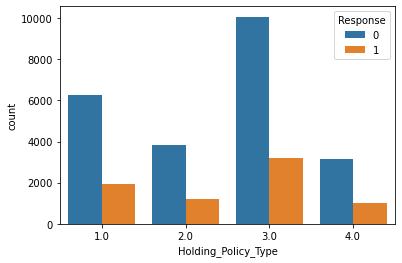

In [19]:
sns.countplot(df.Holding_Policy_Type,hue=df.Response)

<AxesSubplot:title={'center':'Reco_Policy_Premium'}, xlabel='Response'>

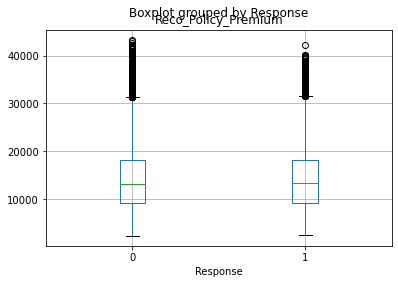

In [20]:
df.boxplot(column="Reco_Policy_Premium",by="Response")

In [21]:
# for 0,1 categories has same alignment of boxplots for reco_policy_premium,means 
# for both categories mean Reco_Policy_Premium is same..means change in response doesnot has change in Reco_Policy_Premium

In [22]:
l2

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration']

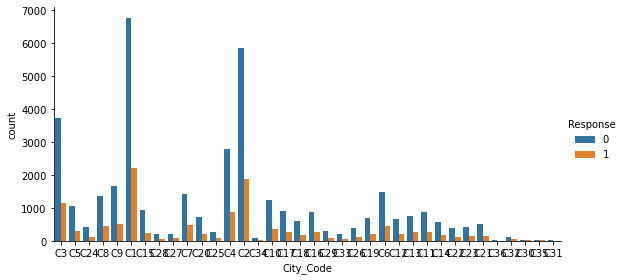

In [23]:
g = sns.catplot(x="City_Code", hue="Response",
                  data=df, kind="count",
                    height=4, aspect=2);

In [24]:
 citydf = df.City_Code.value_counts(normalize=True,sort=True)
 citydf

C1     0.176349
C2     0.152254
C3     0.096085
C4     0.072147
C9     0.042942
C6     0.038324
C7     0.037538
C8     0.035494
C10    0.031661
C5     0.026807
C15    0.023309
C17    0.022778
C11    0.022542
C16    0.022307
C13    0.019752
C20    0.018199
C19    0.017668
C12    0.017059
C18    0.015664
C14    0.014661
C21    0.013345
C23    0.011536
C24    0.010868
C22    0.010141
C26    0.009807
C29    0.007606
C25    0.007193
C27    0.005798
C33    0.005621
C28    0.005601
C32    0.003145
C34    0.002555
C30    0.001140
C35    0.001101
C36    0.000708
C31    0.000295
Name: City_Code, dtype: float64

In [26]:
for i in l2:
    x=len(df[i].unique())
    print(i,x)

City_Code 36
Accomodation_Type 2
Reco_Insurance_Type 2
Is_Spouse 2
Health Indicator 10
Holding_Policy_Duration 16


In [27]:
l1

['Holding_Policy_Type', 'Reco_Policy_Premium']

In [28]:
l3

['ID', 'Region_Code', 'Upper_Age', 'Lower_Age', 'Reco_Policy_Cat', 'Response']

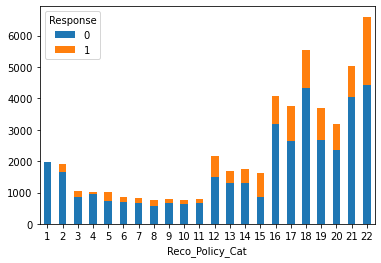

In [29]:
ct =pd.crosstab(df.Reco_Policy_Cat,df.Response)
ax = ct.plot(kind='bar', stacked=True, rot=0)

<AxesSubplot:title={'center':'Upper_Age'}, xlabel='Response'>

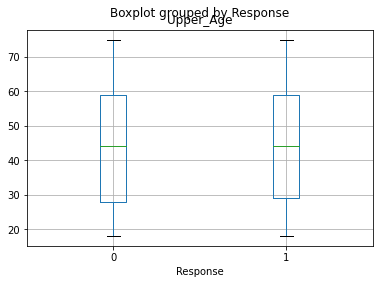

In [30]:
df.boxplot(column="Upper_Age" ,by="Response")

In [31]:
len(df.Region_Code.unique())

5316

In [32]:
pd.crosstab(df.Region_Code,df.Response)

Response,0,1
Region_Code,,
1,71,25
2,60,13
4,59,14
5,61,14
6,56,17
...,...,...
6188,1,0
6189,1,0
6191,0,1


<AxesSubplot:title={'center':'Lower_Age'}, xlabel='Response'>

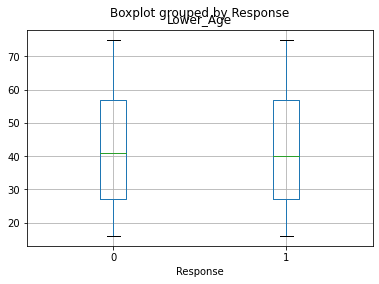

In [33]:
df.boxplot(column="Lower_Age" ,by="Response")

In [34]:
df.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [35]:
df.isnull().sum()/len(df) # missing values in terms of %

ID                         0.000000
City_Code                  0.000000
Region_Code                0.000000
Accomodation_Type          0.000000
Reco_Insurance_Type        0.000000
Upper_Age                  0.000000
Lower_Age                  0.000000
Is_Spouse                  0.000000
Health Indicator           0.229767
Holding_Policy_Duration    0.397999
Holding_Policy_Type        0.397999
Reco_Policy_Cat            0.000000
Reco_Policy_Premium        0.000000
Response                   0.000000
dtype: float64

In [246]:
test.isnull().sum()/len(test)

ID                         0.000000
City_Code                  0.000000
Region_Code                0.000000
Accomodation_Type          0.000000
Reco_Insurance_Type        0.000000
Upper_Age                  0.000000
Lower_Age                  0.000000
Is_Spouse                  0.000000
Health Indicator           0.230543
Holding_Policy_Duration    0.394543
Holding_Policy_Type        0.394543
Reco_Policy_Cat            0.000000
Reco_Policy_Premium        0.000000
dtype: float64

In [36]:
## feature engineering

In [4]:
 df["Upper_Age"]= df["Upper_Age"].astype(float)

In [5]:
t["Upper_Age"]= t["Upper_Age"].astype(float)

In [6]:
df["Lower_Age"] = df["Lower_Age"].astype(float)

In [7]:
t["Lower_Age"] = t["Lower_Age"].astype(float)

In [8]:
df["Lower_Age"].dtype

dtype('float64')

In [9]:
df["Holding_Policy_Type"] = df["Holding_Policy_Type"].astype(object)
df["Holding_Policy_Type"].dtype

dtype('O')

In [10]:
t["Holding_Policy_Type"] = t["Holding_Policy_Type"].astype(object)
t["Holding_Policy_Type"].dtype

dtype('O')

<AxesSubplot:>

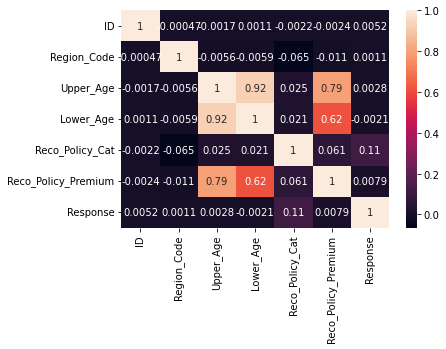

In [42]:
sns.heatmap(df.corr(),annot=True)

In [43]:
df.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                  float64
Lower_Age                  float64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type         object
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [11]:
t.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                  float64
Lower_Age                  float64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type         object
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
dtype: object

In [12]:
df.Reco_Policy_Premium.skew()

0.7824628894616024

In [13]:
df.Upper_Age.skew()

0.217370453151133

In [14]:
df.Lower_Age.skew()

0.330594032216263

In [47]:
# outliers 

<AxesSubplot:xlabel='Lower_Age'>

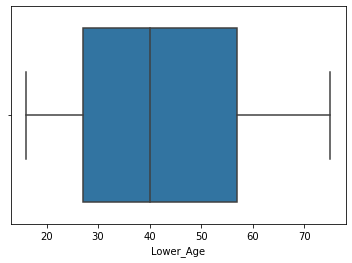

In [15]:
sns.boxplot(df.Lower_Age)

<AxesSubplot:xlabel='Upper_Age'>

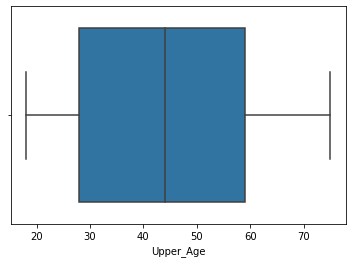

In [16]:
sns.boxplot(df.Upper_Age)

<AxesSubplot:xlabel='Reco_Policy_Premium'>

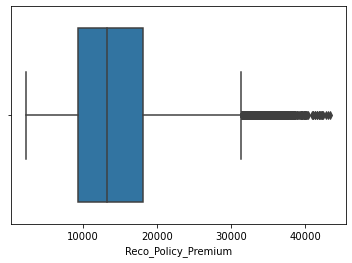

In [17]:
sns.boxplot(df.Reco_Policy_Premium)

<AxesSubplot:xlabel='Reco_Policy_Premium'>

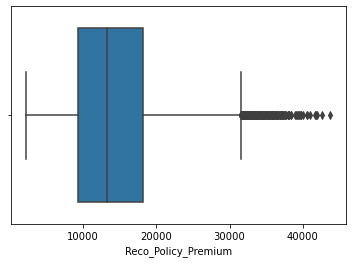

In [18]:
sns.boxplot(t.Reco_Policy_Premium)

In [19]:
# Data Cleaning

In [20]:
df.isnull().sum()/len(df)

ID                         0.000000
City_Code                  0.000000
Region_Code                0.000000
Accomodation_Type          0.000000
Reco_Insurance_Type        0.000000
Upper_Age                  0.000000
Lower_Age                  0.000000
Is_Spouse                  0.000000
Health Indicator           0.229767
Holding_Policy_Duration    0.397999
Holding_Policy_Type        0.397999
Reco_Policy_Cat            0.000000
Reco_Policy_Premium        0.000000
Response                   0.000000
dtype: float64

In [21]:
#columns - #Holding_Policy_Duration    0.397999
          #Holding_Policy_Type        0.397999
      # has 40% missing values so we can remove these two columns

In [22]:
df=df.drop(columns=["Holding_Policy_Duration","Holding_Policy_Type"])
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36.0,36.0,No,X1,22,11628.0,0
1,2,C5,1117,Owned,Joint,75.0,22.0,No,X2,22,30510.0,0
2,3,C5,3732,Owned,Individual,32.0,32.0,No,NaN,19,7450.0,1
3,4,C24,4378,Owned,Joint,52.0,48.0,No,X1,19,17780.0,0
4,5,C8,2190,Rented,Individual,44.0,44.0,No,X2,16,10404.0,0


In [23]:
m=df["Health Indicator"].mode()
df["Health Indicator"].fillna(m[0],inplace=True)       # m= X1

In [24]:
df.isnull().sum()

ID                     0
City_Code              0
Region_Code            0
Accomodation_Type      0
Reco_Insurance_Type    0
Upper_Age              0
Lower_Age              0
Is_Spouse              0
Health Indicator       0
Reco_Policy_Cat        0
Reco_Policy_Premium    0
Response               0
dtype: int64

In [25]:
t=t.drop(columns=["Holding_Policy_Duration","Holding_Policy_Type"])
t.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30.0,30.0,No,NaN,5,11934.0
1,50884,C4,7,Owned,Joint,69.0,68.0,Yes,X1,18,32204.8
2,50885,C1,564,Rented,Individual,28.0,28.0,No,X3,17,9240.0
3,50886,C3,1177,Rented,Individual,23.0,23.0,No,X3,18,9086.0
4,50887,C1,951,Owned,Individual,75.0,75.0,No,X3,5,22534.0


In [27]:
t["Health Indicator"].fillna(m[0],inplace=True)

In [29]:
t.isnull().sum()

ID                     0
City_Code              0
Region_Code            0
Accomodation_Type      0
Reco_Insurance_Type    0
Upper_Age              0
Lower_Age              0
Is_Spouse              0
Health Indicator       0
Reco_Policy_Cat        0
Reco_Policy_Premium    0
dtype: int64

In [57]:
# treating outliers

In [30]:
pip install feature_engine

In [32]:
from feature_engine.outliers import Winsorizer
win= Winsorizer(capping_method='iqr',tail="both",fold=1.5,variables=["Reco_Policy_Premium"])
df["Reco_Policy_Premium"]=win.fit_transform(df[["Reco_Policy_Premium"]])



In [33]:
print(win.left_tail_caps_,win.right_tail_caps_)

{'Reco_Policy_Premium': -4024.0} {'Reco_Policy_Premium': 31368.0}


<AxesSubplot:xlabel='Reco_Policy_Premium'>

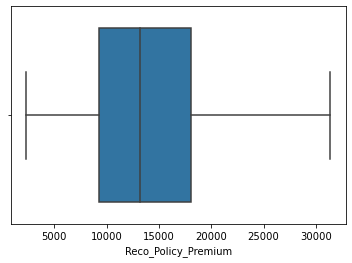

In [34]:
sns.boxplot(df.Reco_Policy_Premium)

In [35]:
Q1= t["Reco_Policy_Premium"].quantile(0.25)
Q3= t["Reco_Policy_Premium"].quantile(0.75)
iqr=Q3-Q1

lb=Q1-(1.5*iqr)
ub=Q3+(1.5*iqr)
print(lb,ub)

-4089.899999999998 31576.499999999996


In [36]:
t.loc[t["Reco_Policy_Premium"] < -4089.899999999998,["Reco_Policy_Premium"]] = -4024
t.loc[t["Reco_Policy_Premium"] > 31576.499999999996,["Reco_Policy_Premium"]] =  31368

<AxesSubplot:xlabel='Reco_Policy_Premium'>

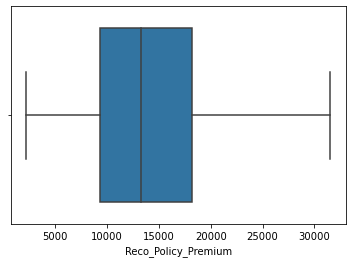

In [37]:
sns.boxplot(t["Reco_Policy_Premium"])

## data wrangling

### encoding

In [38]:
df = df.drop("ID",axis=1)
df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36.0,36.0,No,X1,22,11628.0,0
1,C5,1117,Owned,Joint,75.0,22.0,No,X2,22,30510.0,0
2,C5,3732,Owned,Individual,32.0,32.0,No,X1,19,7450.0,1
3,C24,4378,Owned,Joint,52.0,48.0,No,X1,19,17780.0,0
4,C8,2190,Rented,Individual,44.0,44.0,No,X2,16,10404.0,0


In [39]:
t = t.drop("ID",axis=1)
t.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Reco_Policy_Cat,Reco_Policy_Premium
0,C1,156,Owned,Individual,30.0,30.0,No,X1,5,11934.0
1,C4,7,Owned,Joint,69.0,68.0,Yes,X1,18,31368.0
2,C1,564,Rented,Individual,28.0,28.0,No,X3,17,9240.0
3,C3,1177,Rented,Individual,23.0,23.0,No,X3,18,9086.0
4,C1,951,Owned,Individual,75.0,75.0,No,X3,5,22534.0


In [40]:
cat = df.loc[:,df.dtypes=="object"].head()
cat

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator
0,C3,Rented,Individual,No,X1
1,C5,Owned,Joint,No,X2
2,C5,Owned,Individual,No,X1
3,C24,Owned,Joint,No,X1
4,C8,Rented,Individual,No,X2


In [41]:
items2 = df["City_Code"].unique()
items_map2 = {i:val for i,val in enumerate(items2)}
inverse_items_map2 = {val:i for i,val in enumerate(items2)}

df["City_Code"]=df["City_Code"].map(inverse_items_map2)
df["City_Code"].head(n=10)

0    0
1    1
2    1
3    2
4    3
5    4
6    0
7    5
8    6
9    5
Name: City_Code, dtype: int64

In [42]:
items5 = t["City_Code"].unique()
items_map5 = {i:val for i,val in enumerate(items5)}
inverse_items_map5 = {val:i for i,val in enumerate(items5)}

t["City_Code"]=t["City_Code"].map(inverse_items_map5)
t["City_Code"].head(n=10)

0    0
1    1
2    0
3    2
4    0
5    0
6    3
7    4
8    5
9    2
Name: City_Code, dtype: int64

In [43]:
df = pd.get_dummies(df, columns = ["Accomodation_Type","Is_Spouse","Health Indicator","Reco_Insurance_Type"],drop_first=True)

In [44]:
df.shape

(50882, 18)

In [45]:
t = pd.get_dummies(t, columns = ["Accomodation_Type","Is_Spouse","Health Indicator","Reco_Insurance_Type"],drop_first=True)

In [48]:

t.shape

(21805, 17)

In [49]:
t.head()

,City_Code,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,Accomodation_Type_Rented,Is_Spouse_Yes,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9,Reco_Insurance_Type_Joint
0,0,156,30.0,30.0,5,11934.0,0,0,0,0,0,0,0,0,0,0,0
1,1,7,69.0,68.0,18,31368.0,0,1,0,0,0,0,0,0,0,0,1
2,0,564,28.0,28.0,17,9240.0,1,0,0,1,0,0,0,0,0,0,0
3,2,1177,23.0,23.0,18,9086.0,1,0,0,1,0,0,0,0,0,0,0
4,0,951,75.0,75.0,5,22534.0,0,0,0,1,0,0,0,0,0,0,0


In [50]:
df.head()

,City_Code,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type_Rented,Is_Spouse_Yes,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9,Reco_Insurance_Type_Joint
0,0,3213,36.0,36.0,22,11628.0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,1117,75.0,22.0,22,30510.0,0,0,0,1,0,0,0,0,0,0,0,1
2,1,3732,32.0,32.0,19,7450.0,1,0,0,0,0,0,0,0,0,0,0,0
3,2,4378,52.0,48.0,19,17780.0,0,0,0,0,0,0,0,0,0,0,0,1
4,3,2190,44.0,44.0,16,10404.0,0,1,0,1,0,0,0,0,0,0,0,0


In [74]:
# X and y

In [51]:
X= df.drop(columns="Response")
X.head()

,City_Code,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,Accomodation_Type_Rented,Is_Spouse_Yes,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9,Reco_Insurance_Type_Joint
0,0,3213,36.0,36.0,22,11628.0,1,0,0,0,0,0,0,0,0,0,0
1,1,1117,75.0,22.0,22,30510.0,0,0,1,0,0,0,0,0,0,0,1
2,1,3732,32.0,32.0,19,7450.0,0,0,0,0,0,0,0,0,0,0,0
3,2,4378,52.0,48.0,19,17780.0,0,0,0,0,0,0,0,0,0,0,1
4,3,2190,44.0,44.0,16,10404.0,1,0,1,0,0,0,0,0,0,0,0


In [52]:
X.shape

(50882, 17)

In [53]:
y = df[["Response"]]
y.head()

,Response
0,0
1,0
2,1
3,0
4,0


### Train Test Split

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [57]:
t=sc.transform(t)
t

array([[-1.50600642, -1.21671603, -2.64299114, ..., -1.04087336,
        -1.0351004 , -1.76297589],
       [-1.49175266, -1.21678938, -2.51229074, ..., -1.04087336,
        -1.0351004 ,  4.39203386],
       [-1.50600642, -1.21651518, -2.64969373, ..., -1.04087336,
        -1.0351004 , -1.76297589],
       ...,
       [-1.30645383, -1.2155769 , -2.49553427, ..., -1.04087336,
        -1.0351004 , -1.76297589],
       [-1.27794631, -1.21596777, -2.6597476 , ..., -1.04087336,
        -1.0351004 , -1.76297589],
       [-1.46324515, -1.21501225, -2.49888557, ..., -1.04087336,
        -1.0351004 , -1.76297589]])

In [114]:
# PCA 
from sklearn.decomposition import PCA
pca_model = PCA(n_components=0.95)
x_train_pca= pca_model.fit_transform(X_train)
x_test_pca = pca_model.transform(X_test)
t11= pca_model.transform(t11)                      # test df pca


In [111]:
from sklearn.decomposition import PCA
pca_model2 = PCA(n_components=12)
x_train_pca2= pca_model.fit_transform(X_train)
x_test_pca2 = pca_model.transform(X_test)


## model 1. KNN

In [139]:
def model_knn(X_train,X_test,y_train,y_test,x):
    from sklearn.neighbors import KNeighborsClassifier
    clf = KNeighborsClassifier()
    param_grid= {"n_neighbors":[10,15,20,25]}
    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(clf,param_grid,cv=5,scoring="accuracy")
    grid.fit(X_train,y_train)
    print("best_params ",grid.best_params_)
    
    train_pred = grid.best_estimator_.predict(X_train)
    test_pred =grid.best_estimator_.predict(X_test)
    from sklearn.metrics import accuracy_score ,confusion_matrix
    test_accuracy= accuracy_score(y_test,test_pred)
    train_accuracy= accuracy_score(y_train,train_pred)
    print("test acc= ", test_accuracy,"train_accuracy= ",train_accuracy)
    from sklearn.model_selection import cross_val_score
    scores= cross_val_score(grid.best_estimator_,x,y,cv=5)
    print("crossval ",scores.mean())
    

In [140]:
def model_knn2(x_train,x_test,y_train,y_test,x):
    from sklearn.neighbors import KNeighborsClassifier
    clf = KNeighborsClassifier()
    clf.fit(x_train,y_train)
    
    train_pred = clf.predict(x_train)
    test_pred =clf.predict(x_test)
    from sklearn.metrics import accuracy_score ,confusion_matrix
    test_accuracy= accuracy_score(y_test,test_pred)
    train_accuracy= accuracy_score(y_train,train_pred)
    print("test acc= ", test_accuracy,"train_accuracy= ",train_accuracy)
    from sklearn.model_selection import cross_val_score
    scores= cross_val_score(clf,x,y,cv=5)
    print("crossval ",scores.mean())

In [141]:
model_knn(X_train,X_test,y_train,y_test,X)     # knn WITH HPT

best_params  {'n_neighbors': 20}
test acc=  0.7525712414018998 train_accuracy=  0.7637644944829716
crossval  0.7589914160089682


In [133]:
model_knn2(X_train,X_test,y_train,y_test,X)      # with default parameters

test acc=  0.709466098919096 train_accuracy=  0.7908302215234299
crossval  0.7112339152040332


In [134]:
model_knn(x_train_pca,x_test_pca,y_train,y_test,X) # knn with pca

best_params  {'n_neighbors': 20}
test acc=  0.7527022600720603 train_accuracy=  0.763455653199315
crossval  0.758932447951139


# model 2. logistic regression

In [146]:
def model_lr1(X_train,X_test,y_train,y_test,x):
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression()
    clf.fit(X_train,y_train)
    train_pred = clf.predict(X_train)
    test_pred =clf.predict(X_test)
    from sklearn.metrics import accuracy_score ,confusion_matrix
    test_accuracy= accuracy_score(y_test,test_pred)
    train_accuracy= accuracy_score(y_train,train_pred)
    print("test acc= ", test_accuracy,"train_accuracy= ",train_accuracy)
    from sklearn.model_selection import cross_val_score
    scores= cross_val_score(clf,x,y,cv=5)
    print("crossval ",scores.mean())

In [147]:
model_lr1(X_train,X_test,y_train,y_test,X)

test acc=  0.754208974778906 train_accuracy=  0.7625572058286774
crossval  0.7600526711019977


In [148]:
def model_lr(X_train,X_test,y_train,y_test,x):
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression()
    param_grid= {"penalty":("l1","l2","elasticnet","none"),"solver":("newton-cg","lbfgs","liblinear","sag","saga")}
    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(clf,param_grid,cv=5,scoring="accuracy")
    grid.fit(X_train,y_train)
    print("best_params ",grid.best_params_)
    
    
    
    train_pred = grid.best_estimator_.predict(X_train)
    test_pred =grid.best_estimator_.predict(X_test)
    
    from sklearn.metrics import accuracy_score ,confusion_matrix
    test_accuracy= accuracy_score(y_test,test_pred)
    train_accuracy= accuracy_score(y_train,train_pred)
    print("test acc= ", test_accuracy,"train_accuracy= ",train_accuracy)
    from sklearn.model_selection import cross_val_score
    scores= cross_val_score(grid.best_estimator_,x,y,cv=5)
    print("crossval ",scores.mean())
    

In [138]:
model_lr(X_train,X_test,y_train,y_test,X)         # logregressioin with HPT

best_params  {'penalty': 'l1', 'solver': 'liblinear'}
test acc=  0.754208974778906 train_accuracy=  0.7625572058286774
crossval  0.7600526711019977


In [150]:
model_lr(x_train_pca,x_test_pca,y_train,y_test,X)  # logregression pca

best_params  {'penalty': 'l1', 'solver': 'liblinear'}
test acc=  0.754208974778906 train_accuracy=  0.7625572058286774
crossval  0.7600526711019977


## model 3. Decesion Tree

In [157]:
# model 3. decesion tree
from sklearn.tree import DecisionTreeClassifier
def dt(x_train,x_test,y_train,y_test,x):
    clf = DecisionTreeClassifier()
    param_grid= {"criterion" : ["gini", "entropy", "log_loss"],"max_depth":[2,3,4,5,6]}
    from sklearn.model_selection import GridSearchCV
    grid= GridSearchCV(clf,param_grid,cv=5,scoring="accuracy")
    grid.fit(x_train,y_train)
    
    train_pred = grid.best_estimator_.predict(x_train)
    test_pred =grid.best_estimator_.predict(x_test)
    print("best_params ",grid.best_params_)

    from sklearn.metrics import accuracy_score ,confusion_matrix
    test_accuracy= accuracy_score(y_test,test_pred)
    train_accuracy= accuracy_score(y_train,train_pred)
    print("test acc= ", test_accuracy,"train_accuracy= ",train_accuracy)
    from sklearn.model_selection import cross_val_score
    scores= cross_val_score(grid.best_estimator_,x,y,cv=5)
    print("crossval ",scores.mean())

In [158]:
dt(X_train,X_test,y_train,y_test,X)

best_params  {'criterion': 'gini', 'max_depth': 3}
test acc=  0.7537504094333443 train_accuracy=  0.7630906589549934
crossval  0.7598561360151729


In [162]:
dt(x_train_pca,x_test_pca,y_train,y_test,X)           # deseciontree with pca

best_params  {'criterion': 'gini', 'max_depth': 2}
test acc=  0.754208974778906 train_accuracy=  0.7625572058286774
crossval  0.7600526711019977


In [176]:
def dt_model(x_train,x_test,y_train,y_test,x):
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier()
    model.fit(x_train,y_train) 
    train_pred = model.predict(x_train)
    test_pred =model.predict(x_test)

    from sklearn.metrics import accuracy_score ,confusion_matrix
    test_accuracy= accuracy_score(y_test,test_pred)
    train_accuracy= accuracy_score(y_train,train_pred)
    print("test acc= ", test_accuracy,"train_accuracy= ",train_accuracy)
    from sklearn.model_selection import cross_val_score
    scores= cross_val_score(clf,x,y,cv=5)
    print("crossval ",scores.mean())
    feature_df=pd.DataFrame(index=x.columns,data=model.feature_importances_,columns=["feature importance"])
    print(feature_df)
    

In [177]:
dt_model(X_train,X_test,y_train,y_test,X)      # Dcesion tree with default params   

test acc=  0.6685227644939404 train_accuracy=  1.0
crossval  0.7112339152040332
                           feature importance
City_Code                            0.109893
Region_Code                          0.282680
Upper_Age                            0.097556
Lower_Age                            0.105729
Reco_Policy_Cat                      0.049887
Reco_Policy_Premium                  0.249181
Accomodation_Type_Rented             0.016710
Is_Spouse_Yes                        0.008046
Health Indicator_X2                  0.022034
Health Indicator_X3                  0.017026
Health Indicator_X4                  0.017069
Health Indicator_X5                  0.009296
Health Indicator_X6                  0.006650
Health Indicator_X7                  0.001525
Health Indicator_X8                  0.000575
Health Indicator_X9                  0.000591
Reco_Insurance_Type_Joint            0.005553


In [180]:
def dt_model2(x_train,x_test,y_train,y_test,x):
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(max_depth=3)         # from hpt max_depth=3
    model.fit(x_train,y_train) 
    train_pred = model.predict(x_train)
    test_pred =model.predict(x_test)

    from sklearn.metrics import accuracy_score ,confusion_matrix
    test_accuracy= accuracy_score(y_test,test_pred)
    train_accuracy= accuracy_score(y_train,train_pred)
    print("test acc= ", test_accuracy,"train_accuracy= ",train_accuracy)
    from sklearn.model_selection import cross_val_score
    scores= cross_val_score(clf,x,y,cv=5)
    print("crossval ",scores.mean())
    feature_df=pd.DataFrame(index=x.columns,data=model.feature_importances_,columns=["feature importance"])
    print(feature_df)
    

In [181]:
dt_model2(X_train,X_test,y_train,y_test,X)

test acc=  0.7537504094333443 train_accuracy=  0.7630906589549934
crossval  0.7112339152040332
                           feature importance
City_Code                            0.066916
Region_Code                          0.000000
Upper_Age                            0.000000
Lower_Age                            0.000000
Reco_Policy_Cat                      0.932282
Reco_Policy_Premium                  0.000000
Accomodation_Type_Rented             0.000000
Is_Spouse_Yes                        0.000000
Health Indicator_X2                  0.000000
Health Indicator_X3                  0.000000
Health Indicator_X4                  0.000000
Health Indicator_X5                  0.000000
Health Indicator_X6                  0.000000
Health Indicator_X7                  0.000000
Health Indicator_X8                  0.000801
Health Indicator_X9                  0.000000
Reco_Insurance_Type_Joint            0.000000


In [182]:
X_dt = X[["City_Code","Reco_Policy_Cat","Health Indicator_X8"]]
X_dt.head()
                       

,City_Code,Reco_Policy_Cat,Health Indicator_X8
0,0,22,0
1,1,22,0
2,1,19,0
3,2,19,0
4,3,16,0


In [183]:
from sklearn.model_selection import train_test_split
X_train8,X_test8,y_train,y_test = train_test_split(X_dt,y,test_size=0.3,random_state=0)

In [174]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train8=sc.fit_transform(X_train8)
X_test8=sc.transform(X_test8)


In [184]:
dt_model2(X_train8,X_test8,y_train,y_test,X_dt)              # final decesion tree model

test acc=  0.7537504094333443 train_accuracy=  0.7630906589549934
crossval  0.7149676724337712
                     feature importance
City_Code                      0.066916
Reco_Policy_Cat                0.932282
Health Indicator_X8            0.000801


###  model 4. Random Forest

In [244]:
# model 4. randomforest

In [185]:
def RF_model(x_train,x_test,y_train,y_test,x):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier()                # with default params
    model.fit(x_train,y_train) 
    train_pred = model.predict(x_train)
    test_pred =model.predict(x_test)

    from sklearn.metrics import accuracy_score ,confusion_matrix
    test_accuracy= accuracy_score(y_test,test_pred)
    train_accuracy= accuracy_score(y_train,train_pred)
    print("test acc= ", test_accuracy,"train_accuracy= ",train_accuracy)
    from sklearn.model_selection import cross_val_score
    scores= cross_val_score(model,x,y,cv=5)
    print("crossval ",scores.mean())
    
    feature_df=pd.DataFrame(index=x.columns,data=model.feature_importances_,columns=["feature importance"])
    print(feature_df)
    

In [186]:
RF_model(X_train,X_test,y_train,y_test,X)

test acc=  0.7477235506059613 train_accuracy=  1.0
crossval  0.7541370532456032
                           feature importance
City_Code                            0.117627
Region_Code                          0.223532
Upper_Age                            0.110714
Lower_Age                            0.111648
Reco_Policy_Cat                      0.120999
Reco_Policy_Premium                  0.222215
Accomodation_Type_Rented             0.018862
Is_Spouse_Yes                        0.006885
Health Indicator_X2                  0.018096
Health Indicator_X3                  0.014887
Health Indicator_X4                  0.013314
Health Indicator_X5                  0.006708
Health Indicator_X6                  0.005773
Health Indicator_X7                  0.001312
Health Indicator_X8                  0.000567
Health Indicator_X9                  0.000538
Reco_Insurance_Type_Joint            0.006322


In [193]:
from sklearn.ensemble import RandomForestClassifier
def RF(x_train,x_test,y_train,y_test,x):
    clf = RandomForestClassifier()
    param_grid= {"criterion" : ["gini", "entropy", "log_loss"],"max_depth":[2,3,4,5,6]}
    from sklearn.model_selection import GridSearchCV
    grid= GridSearchCV(clf,param_grid,cv=5,scoring="accuracy")
    grid.fit(x_train,y_train)
    
    train_pred = grid.best_estimator_.predict(x_train)
    test_pred =grid.best_estimator_.predict(x_test)
    print("best_params",grid.best_params_)

    from sklearn.metrics import accuracy_score ,confusion_matrix
    test_accuracy= accuracy_score(y_test,test_pred)
    train_accuracy= accuracy_score(y_train,train_pred)
    print("test acc= ", test_accuracy,"train_accuracy= ",train_accuracy)
    from sklearn.model_selection import cross_val_score
    scores= cross_val_score(grid.best_estimator_,x,y,cv=5)
    print("crossval ",scores.mean())
    
    

In [194]:
RF(X_train,X_test,y_train,y_test,X)              # RF with HPT ,NO overfitting 

best_params {'criterion': 'gini', 'max_depth': 2}
test acc=  0.754208974778906 train_accuracy=  0.7625572058286774
crossval  0.7600526711019977


In [195]:
def RF_model_hpt(x_train,x_test,y_train,y_test,x):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(max_depth=2)          # with HPT params
    model.fit(x_train,y_train) 
    train_pred = model.predict(x_train)
    test_pred =model.predict(x_test)

    from sklearn.metrics import accuracy_score ,confusion_matrix
    test_accuracy= accuracy_score(y_test,test_pred)
    train_accuracy= accuracy_score(y_train,train_pred)
    print("test acc= ", test_accuracy,"train_accuracy= ",train_accuracy)
    from sklearn.model_selection import cross_val_score
    scores= cross_val_score(model,x,y,cv=5)
    print("crossval ",scores.mean())
    
    feature_df=pd.DataFrame(index=x.columns,data=model.feature_importances_,columns=["feature importance"])
    print(feature_df)
    

In [196]:
RF_model_hpt(X_train,X_test,y_train,y_test,X)       #  RF with HPT params

test acc=  0.754208974778906 train_accuracy=  0.7625572058286774
crossval  0.7600526711019977
                           feature importance
City_Code                            0.049282
Region_Code                          0.123915
Upper_Age                            0.074622
Lower_Age                            0.037264
Reco_Policy_Cat                      0.516954
Reco_Policy_Premium                  0.105776
Accomodation_Type_Rented             0.003114
Is_Spouse_Yes                        0.000092
Health Indicator_X2                  0.006038
Health Indicator_X3                  0.010759
Health Indicator_X4                  0.000055
Health Indicator_X5                  0.001827
Health Indicator_X6                  0.001666
Health Indicator_X7                  0.045042
Health Indicator_X8                  0.006914
Health Indicator_X9                  0.007426
Reco_Insurance_Type_Joint            0.009253


### model 5 . Adaboost

In [202]:
def model_ab(x_train,x_test,y_train,y_test,x):
    from sklearn.ensemble import AdaBoostClassifier
    model_ab= AdaBoostClassifier()
    model_ab.fit(x_train,y_train) 
    train_pred = model_ab.predict(x_train)
    test_pred =model_ab.predict(x_test)

    from sklearn.metrics import accuracy_score ,confusion_matrix
    test_accuracy= accuracy_score(y_test,test_pred)
    train_accuracy= accuracy_score(y_train,train_pred)
    from sklearn.model_selection import cross_val_score
    scores= cross_val_score(model_ab,x,y,cv=5)
    print("test acc= ", test_accuracy,"train_accuracy= ",train_accuracy)
    from sklearn.model_selection import cross_val_score
    scores= cross_val_score(model_ab,x,y,cv=5)
    print("crossval ",scores.mean())
    feature_df=pd.DataFrame(index=x.columns,data=model_ab.feature_importances_,columns=["feature importance"])
    print(feature_df)
    

In [203]:
model_ab(X_train,X_test,y_train,y_test,X)          # ADABOOST with default params

test acc=  0.7541434654438257 train_accuracy=  0.7625572058286774
crossval  0.7600919792780985
                           feature importance
City_Code                                0.04
Region_Code                              0.06
Upper_Age                                0.02
Lower_Age                                0.02
Reco_Policy_Cat                          0.68
Reco_Policy_Premium                      0.14
Accomodation_Type_Rented                 0.00
Is_Spouse_Yes                            0.00
Health Indicator_X2                      0.02
Health Indicator_X3                      0.00
Health Indicator_X4                      0.00
Health Indicator_X5                      0.00
Health Indicator_X6                      0.00
Health Indicator_X7                      0.02
Health Indicator_X8                      0.00
Health Indicator_X9                      0.00
Reco_Insurance_Type_Joint                0.00


In [204]:
def model_ab2(x_train,x_test,y_train,y_test):
   from sklearn.ensemble import AdaBoostClassifier
   model_ab= AdaBoostClassifier()
   param_grid= {"n_estimators":list(range(1,101))}
   from sklearn.model_selection import GridSearchCV
   grid= GridSearchCV(model_ab,param_grid,cv=5,scoring="accuracy")
   grid.fit(x_train,y_train)
   print("best_params",grid.best_params_)

In [205]:
model_ab2(X_train,X_test,y_train,y_test)

best_params {'n_estimators': 1}


In [206]:
def model_ab_HPT(x_train,x_test,y_train,y_test,x):
    from sklearn.ensemble import AdaBoostClassifier
    model_ab= AdaBoostClassifier(n_estimators = 1)
    model_ab.fit(x_train,y_train) 
    train_pred = model_ab.predict(x_train)
    test_pred =model_ab.predict(x_test)

    from sklearn.metrics import accuracy_score ,confusion_matrix
    test_accuracy= accuracy_score(y_test,test_pred)
    train_accuracy= accuracy_score(y_train,train_pred)
    from sklearn.model_selection import cross_val_score
    scores= cross_val_score(model_ab,x,y,cv=5)
    print("test acc= ", test_accuracy,"train_accuracy= ",train_accuracy)
    from sklearn.model_selection import cross_val_score
    scores= cross_val_score(model_ab,x,y,cv=5)
    print("crossval ",scores.mean())
    feature_df=pd.DataFrame(index=x.columns,data=model_ab.feature_importances_,columns=["feature importance"])
    print(feature_df)
    

In [207]:
model_ab_HPT(X_train,X_test,y_train,y_test,X)           # ADABOOST with HPT params

test acc=  0.754208974778906 train_accuracy=  0.7625572058286774
crossval  0.7600526711019977
                           feature importance
City_Code                                 0.0
Region_Code                               0.0
Upper_Age                                 0.0
Lower_Age                                 0.0
Reco_Policy_Cat                           1.0
Reco_Policy_Premium                       0.0
Accomodation_Type_Rented                  0.0
Is_Spouse_Yes                             0.0
Health Indicator_X2                       0.0
Health Indicator_X3                       0.0
Health Indicator_X4                       0.0
Health Indicator_X5                       0.0
Health Indicator_X6                       0.0
Health Indicator_X7                       0.0
Health Indicator_X8                       0.0
Health Indicator_X9                       0.0
Reco_Insurance_Type_Joint                 0.0


In [216]:
X2 = X[["Reco_Policy_Cat"]] 
X2.shape

(50882, 1)

In [217]:
from sklearn.model_selection import train_test_split
X_train6,X_test6,y_train,y_test = train_test_split(X2,y,test_size=0.3,random_state=0)

In [218]:
model_ab_HPT(X_train6,X_test6,y_train,y_test,X2)

test acc=  0.754208974778906 train_accuracy=  0.7625572058286774
crossval  0.7600526711019977
                 feature importance
Reco_Policy_Cat                 1.0


## GBOOST

In [226]:
def model_GB2(x_train,x_test,y_train,y_test,x):
   from sklearn.ensemble import GradientBoostingClassifier
   model_GB= GradientBoostingClassifier()
   model_GB.fit(x_train,y_train)
   train_pred = model_GB.predict(x_train)
   test_pred =model_GB.predict(x_test)

   from sklearn.metrics import accuracy_score ,confusion_matrix
   test_accuracy= accuracy_score(y_test,test_pred)
   train_accuracy= accuracy_score(y_train,train_pred)
   from sklearn.model_selection import cross_val_score
   scores= cross_val_score(model_GB,x,y,cv=5)
   print("crossval ",scores.mean(),"test acc= ", test_accuracy,"train_accuracy= ",train_accuracy)
   feature_df=pd.DataFrame(index=x.columns,data=model_GB.feature_importances_,columns=["feature importance"])
   print(feature_df)
    

In [227]:
model_GB2(X_train,X_test,y_train,y_test,X)    # GBOOST with default params

crossval  0.7601312855229729 test acc=  0.753684900098264 train_accuracy=  0.7635398826403123
                           feature importance
City_Code                            0.082160
Region_Code                          0.083272
Upper_Age                            0.016973
Lower_Age                            0.014943
Reco_Policy_Cat                      0.724416
Reco_Policy_Premium                  0.047949
Accomodation_Type_Rented             0.015175
Is_Spouse_Yes                        0.000227
Health Indicator_X2                  0.000382
Health Indicator_X3                  0.000632
Health Indicator_X4                  0.001093
Health Indicator_X5                  0.002050
Health Indicator_X6                  0.007311
Health Indicator_X7                  0.002638
Health Indicator_X8                  0.000776
Health Indicator_X9                  0.000000
Reco_Insurance_Type_Joint            0.000002


In [222]:
X3 = X.drop(columns=["Reco_Insurance_Type_Joint","Health Indicator_X9"])  
from sklearn.model_selection import train_test_split
X_train11,X_test11,y_train,y_test = train_test_split(X3,y,test_size=0.3,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train11=sc.fit_transform(X_train11)
X_test11=sc.transform(X_test11)


In [224]:
def model_GB(x_train,x_test,y_train,y_test):
   from sklearn.ensemble import GradientBoostingClassifier
   model_GB= GradientBoostingClassifier()
   param_grid= {"n_estimators":list(range(1,101))}
   from sklearn.model_selection import GridSearchCV
   grid= GridSearchCV(model_GB,param_grid,cv=5,scoring="accuracy")
   grid.fit(X_train,y_train)
   print("best_params",grid.best_params_)

In [225]:
model_GB(X_train11,X_test11,y_train,y_test)

best_params {'n_estimators': 35}


In [228]:
def model_GB_HPT(x_train,x_test,y_train,y_test,x):
   from sklearn.ensemble import GradientBoostingClassifier
   model_GB= GradientBoostingClassifier(n_estimators=35)
   model_GB.fit(x_train,y_train)
   train_pred = model_GB.predict(x_train)
   test_pred =model_GB.predict(x_test)

   from sklearn.metrics import accuracy_score ,confusion_matrix
   test_accuracy= accuracy_score(y_test,test_pred)
   train_accuracy= accuracy_score(y_train,train_pred)
   from sklearn.model_selection import cross_val_score
   scores= cross_val_score(model_GB,x,y,cv=5)
   print("crossval ",scores.mean(),"test acc= ", test_accuracy,"train_accuracy= ",train_accuracy)
   feature_df=pd.DataFrame(index=x.columns,data=model_GB.feature_importances_,columns=["feature importance"])
   print(feature_df)
    

In [229]:
model_GB_HPT(X_train11,X_test11,y_train,y_test,X3)      # GBOOST with HPT params

crossval  0.7600133629258972 test acc=  0.7540779561087455 train_accuracy=  0.7627537411910043
                          feature importance
City_Code                           0.071320
Region_Code                         0.050113
Upper_Age                           0.003496
Lower_Age                           0.008358
Reco_Policy_Cat                     0.847104
Reco_Policy_Premium                 0.006117
Accomodation_Type_Rented            0.009134
Is_Spouse_Yes                       0.000000
Health Indicator_X2                 0.000141
Health Indicator_X3                 0.000000
Health Indicator_X4                 0.000000
Health Indicator_X5                 0.000000
Health Indicator_X6                 0.001803
Health Indicator_X7                 0.001755
Health Indicator_X8                 0.000658


# XGBoost

In [61]:
pip install xgboost

In [62]:
def model_XGB(x_train,x_test,y_train,y_test,x):      
  from xgboost import XGBClassifier
  model_xgb= XGBClassifier()
  model_xgb.fit(x_train,y_train)
  train_pred = model_xgb.predict(x_train)
  test_pred =model_xgb.predict(x_test)

  from sklearn.metrics import accuracy_score ,confusion_matrix
  test_accuracy= accuracy_score(y_test,test_pred)
  train_accuracy= accuracy_score(y_train,train_pred)
  from sklearn.model_selection import cross_val_score
  scores= cross_val_score(model_xgb,X,y,cv=5)
  print("test acc= ", test_accuracy,"train_accuracy= ",train_accuracy)
  print("crossval ",scores.mean())
  feature_df=pd.DataFrame(index=x.columns,data=model_xgb.feature_importances_,columns=["feature importance"])
  print(feature_df)

In [63]:
model_XGB(X_train,X_test,y_train,y_test,X)           # XGB with default parameters

test acc=  0.7501473960039305 train_accuracy=  0.7977931886458713
crossval  0.7588341446800437
                           feature importance
City_Code                            0.071972
Region_Code                          0.061599
Upper_Age                            0.050717
Lower_Age                            0.057153
Reco_Policy_Cat                      0.147479
Reco_Policy_Premium                  0.055023
Accomodation_Type_Rented             0.070806
Is_Spouse_Yes                        0.033060
Health Indicator_X2                  0.047169
Health Indicator_X3                  0.054057
Health Indicator_X4                  0.053203
Health Indicator_X5                  0.058427
Health Indicator_X6                  0.057050
Health Indicator_X7                  0.065514
Health Indicator_X8                  0.007361
Health Indicator_X9                  0.044362
Reco_Insurance_Type_Joint            0.065048


In [64]:
def model_XGB2(x_train,x_test,y_train,y_test):
    from xgboost import XGBClassifier
    model_xgb= XGBClassifier()
    param_grid= {'n_estimators': [50,65,80,100,115,130,150]}
    from sklearn.model_selection import GridSearchCV
    grid= GridSearchCV(model_xgb,param_grid,cv=5,scoring="accuracy")
    grid.fit(X_train,y_train)
    print("best_params ",grid.best_params_)

In [65]:
model_XGB2(X_train,X_test,y_train,y_test)

best_params  {'n_estimators': 50}


In [70]:
def model_XGB_HPT(x_train,x_test,y_train,y_test,x):
  from xgboost import XGBClassifier
  model_xgb= XGBClassifier(n_estimators=50)
  model_xgb.fit(x_train,y_train)
  train_pred = model_xgb.predict(x_train)
  test_pred =model_xgb.predict(x_test)

  from sklearn.metrics import accuracy_score ,confusion_matrix
  test_accuracy= accuracy_score(y_test,test_pred)
  train_accuracy= accuracy_score(y_train,train_pred)
  
  from sklearn.model_selection import cross_val_score
  scores= cross_val_score(model_xgb,X,y,cv=5)
  print("test acc= ", test_accuracy,"train_accuracy= ",train_accuracy)
  print(confusion_matrix(y_test,test_pred))
  print("crossval ",scores.mean())
  feature_df=pd.DataFrame(index=x.columns,data=model_xgb.feature_importances_,columns=["feature importance"])
  print(feature_df)

In [71]:
model_XGB_HPT(X_train,X_test,y_train,y_test,X)           # XGBOOST with HPT params

test acc=  0.752112676056338 train_accuracy=  0.7780834994525087
[[11394   119]
 [ 3665    87]]
crossval  0.7598168239766202
                           feature importance
City_Code                            0.079841
Region_Code                          0.064323
Upper_Age                            0.048475
Lower_Age                            0.056750
Reco_Policy_Cat                      0.188124
Reco_Policy_Premium                  0.052693
Accomodation_Type_Rented             0.082222
Is_Spouse_Yes                        0.022524
Health Indicator_X2                  0.036892
Health Indicator_X3                  0.051309
Health Indicator_X4                  0.056563
Health Indicator_X5                  0.056807
Health Indicator_X6                  0.056321
Health Indicator_X7                  0.055842
Health Indicator_X8                  0.006252
Health Indicator_X9                  0.024563
Reco_Insurance_Type_Joint            0.060499


In [72]:
# final model
from xgboost import XGBClassifier
model_xgb= XGBClassifier(n_estimators=50)
model_xgb.fit(X_train,y_train)
train_pred = model_xgb.predict(X_train)
test_pred =model_xgb.predict(X_test)

from sklearn.metrics import accuracy_score ,confusion_matrix
test_accuracy= accuracy_score(y_test,test_pred)
train_accuracy= accuracy_score(y_train,train_pred)
  
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model_xgb,X,y,cv=5)
print("test acc= ", test_accuracy,"train_accuracy= ",train_accuracy)
print(confusion_matrix(y_test,test_pred))
print("crossval ",scores.mean())

test acc=  0.752112676056338 train_accuracy=  0.7780834994525087
[[11394   119]
 [ 3665    87]]
crossval  0.7598168239766202


In [ ]:
### on the basis of all evaluation matrics of different models...
### we found satisfacotory model as model with XGBoost ML algo.
### so XGBoost model will be saved as final model.

In [73]:
# save the final model
from joblib import dump
dump(model_xgb,"insurance_model.joblib")

['insurance_model.joblib']

In [74]:
# load the model
from joblib import load
load_model = load('insurance_model.joblib')

### predicting the insurance leads with our trained model

In [76]:
# t is the data of customers to predict their response for insurance.
insurance_lead_predictions = load_model.predict(t)    

In [86]:
p = pd.Series(insurance_lead_predictions)
p

0        0
1        0
2        0
3        0
4        0
        ..
21800    0
21801    0
21802    0
21803    0
21804    0
Length: 21805, dtype: int32

In [91]:
p.to_csv("p.csv")